# A comparison of word counts between Homer's The Odyssey and Greek Stories by James Baldwin

## The purpose of this analysis is to show the difference in the way we speak from 2 different eras, one is a story written by someone from the time, the other is a story written about stories from the greeks.

### Imports and Function Used

In [ ]:
import requests, re, nltk
from bs4 import BeautifulSoup
from nltk import clean_html
from collections import Counter
import operator
import numpy as np
import pandas as pa
import pylab
import matplotlib.pyplot as plt
    
def TotalWordCount(r):
    text = r.text
    re.sub("[a-zA-Z\s]+", "", text)
    wordArray = text.split()
    return len(wordArray)

def GetWordOccurance(r, n):
    text = r.text

    # Sanitize the text of all non-alphabet characters
    re.sub("[a-zA-Z\s]+", "", text)

    # Break up into array of words for analyzing
    wordArray = text.split()
    
    # Count the number of words in the file
    c = Counter()
    for w in wordArray: c[w] += 1
    
    # Return a dataframe holding n most common words
    return pa.DataFrame(c.most_common(n), columns=['words', 'count'])

def PlotCompare(book1, book2, title):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    fig.suptitle(title, fontsize=24)
    
    # Sort the arrays by count desc
    book1 = book1.sort_values(by='count')
    book2 = book2.sort_values(by='count')
    
    # Plot 2 horizontal graphs
    book1.plot.barh(x='words', y='count', ax=ax1, color="blue")
    book2.plot.barh(x='words', y='count', ax=ax2, color="red")
    
    plt.show()
    return

### Reading text and creating results:

Odyssey Total Words: 132606

Greek Stories Total Words: 46776



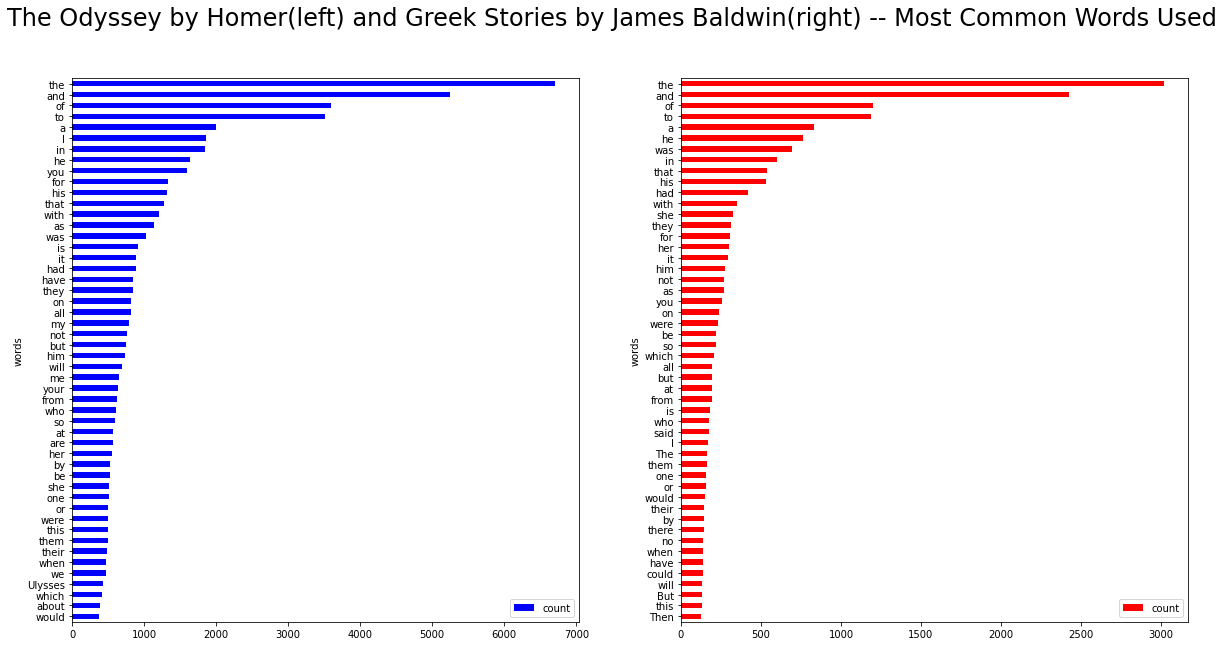

In [20]:
# Read the books as a string
odyssey = requests .get('https://www.gutenberg.org/cache/epub/1727/pg1727.txt')
greekStories = requests .get('https://www.gutenberg.org/cache/epub/11582/pg11582.txt')

# Turn the books into arrays with word->wordcount
odysseyWords = GetWordOccurance(odyssey, 50)
greekStoriesWords = GetWordOccurance(greekStories, 50)

# Print the data for each text
print("Odyssey Total Words: " + str(TotalWordCount(odyssey)) + "\n")
print("Greek Stories Total Words: " + str(TotalWordCount(greekStories)) + "\n")
# print(TotalWordCount(odyssey))

# Show the graphs
PlotCompare(odysseyWords, greekStoriesWords, "The Odyssey by Homer(left) and Greek Stories by James Baldwin(right) -- Most Common Words Used")

### Results:
- The data I found was interesting. The odyssey was written in a different language, so this analysis is only as good as the translation. 

- One notice was that the top words in both books were the same and were proportional to each other, which adds up with the most used words in the english language. 

- The word "Ulysses" comes up quite often. Since he is the main character of the Odyssey this makes sense, but this is the only proper noun to appear on either list. 

- Another note is the placement of the word "her" on either list, which shows a much greater use in Greek Stories than in The Odyssey